In [2]:
from keras.datasets import mnist
(train_data, train_target), (test_data, test_target) = mnist.load_data()

train_data=train_data/255.0
test_data=test_data/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


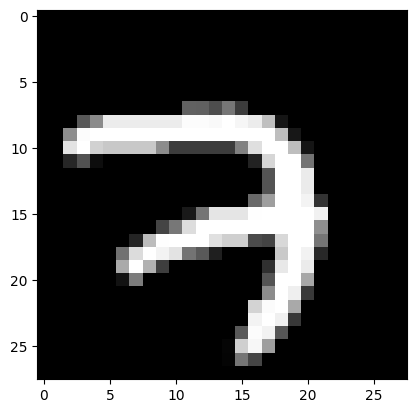

In [4]:
from matplotlib import pyplot as plt
plt.imshow(train_data[5000], cmap='gray')

In [5]:
print(train_target[5000])

7


In [6]:
import numpy as np

noise=np.random.normal(loc=0, scale=1, size=train_data.shape)
print(noise.shape)

(60000, 28, 28)


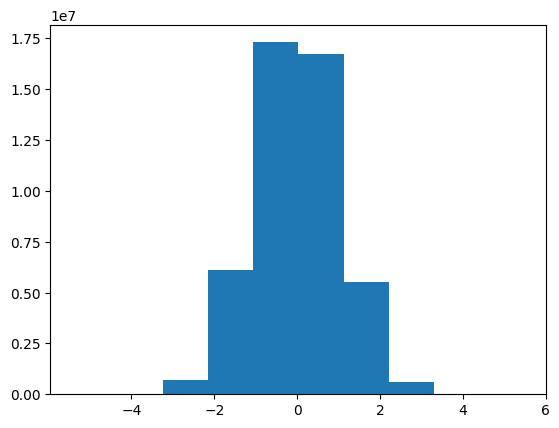

In [7]:
plt.hist(noise.flatten(),bins=10)
plt.show()

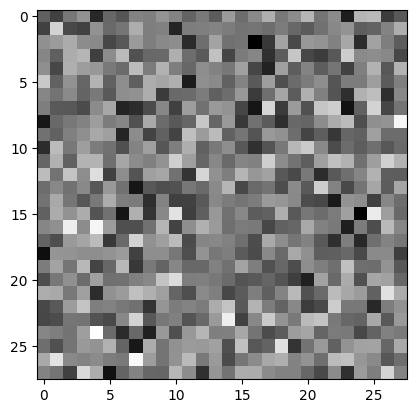

In [8]:
plt.imshow(noise[0], cmap='gray')

In [9]:
print(noise[0])

[[-6.62662684e-01 -1.34516487e+00 -1.43230259e-01  4.49366271e-01
  -1.91496857e+00 -5.20232921e-01 -9.19718067e-01  1.47332422e-01
   2.53292574e-02  5.05726149e-01  1.19601416e-01 -5.99132164e-01
  -8.63489019e-02 -7.52272026e-01  6.55712328e-01 -3.70630439e-01
   2.52928786e-01  1.11580032e+00 -1.29323596e-01  3.16845843e-01
   1.26757236e+00 -2.20900000e-01  2.90635769e-01 -2.18217728e+00
   1.25445827e+00  1.33445234e+00 -1.45194248e+00 -8.07249172e-01]
 [-1.33718494e+00  1.89882516e+00 -1.18509254e+00 -1.34281878e+00
   4.62503211e-01 -4.63514425e-01 -2.00518751e-01  1.06485958e+00
   2.51697490e-03  7.29795024e-02 -2.03033797e+00 -9.71858073e-03
   3.61408721e-02  1.50074343e-01 -4.47759019e-02 -2.46381764e-01
  -1.89840855e-01 -3.80061814e-01 -4.42021253e-02 -4.85414344e-01
  -7.79042618e-01 -2.97142441e-01  2.34706787e-01  5.02815221e-01
  -7.22291380e-01 -5.97546982e-01  1.41187798e-01  1.08711166e+00]
 [ 4.18075421e-01  6.68613506e-01  1.01860551e+00  3.22243947e-01
   2.466

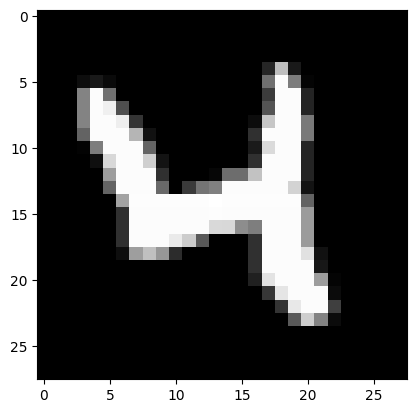

In [10]:
plt.imshow(train_data[20], cmap='gray')

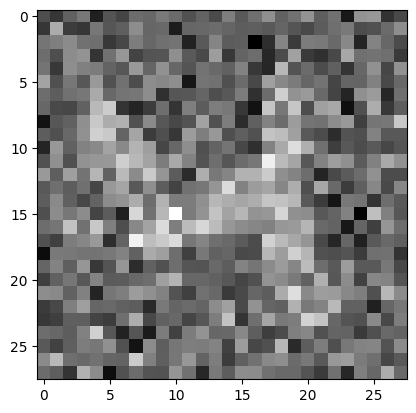

In [11]:
noisy_img=train_data[20]+0.5*noise[0]
plt.imshow(noisy_img, cmap='gray')

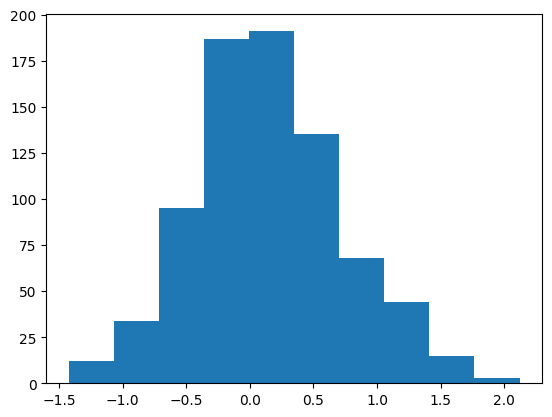

In [12]:
plt.hist(noisy_img.flatten(),bins=10)
plt.show()

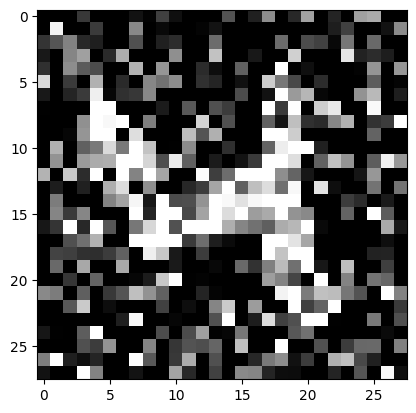

In [13]:
noisy_clip=np.clip(noisy_img, 0, 1)
plt.imshow(noisy_clip, cmap='gray')

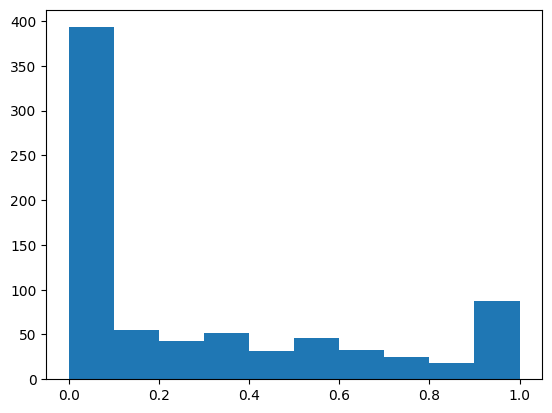

In [14]:
plt.hist(noisy_clip.flatten(),bins=10)
plt.show()

In [15]:
import numpy as np

train_data=train_data.reshape(train_data.shape[0], train_data.shape[1], train_data.shape[2],1)
test_data=test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2],1)

In [16]:
train_data_noisy=train_data+0.5*np.random.normal(loc=0, scale=1, size=train_data.shape)
test_data_noisy=test_data+0.5*np.random.normal(loc=0, scale=1, size=test_data.shape)

#adding random noise to the digits from gaussian distribution

train_data_noisy=np.clip(train_data_noisy,0,1)
test_data_noisy=np.clip(test_data_noisy,0,1)

#clipping the pixels values greater than 1 and less than 0

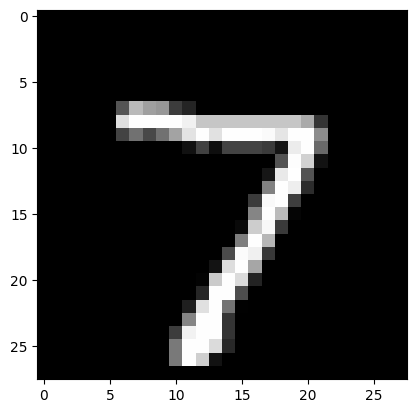

In [17]:
from matplotlib import pyplot as plt
plt.imshow(test_data[0].reshape(28,28), cmap='gray')

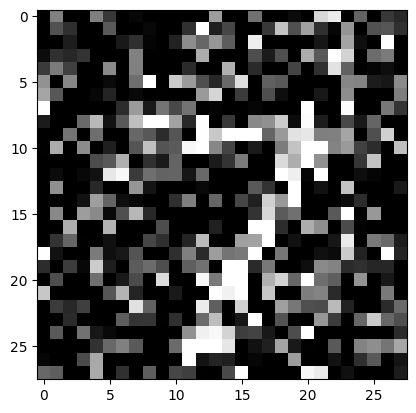

In [18]:
plt.imshow(test_data_noisy[0].reshape(28,28),cmap='gray')

In [19]:
train_data.shape[1:]

(28, 28, 1)

In [21]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_layer=Input(shape=train_data.shape[1:])

layer1=Conv2D(32,(3,3), activation='relu', padding='same')(input_layer)
layer2=MaxPooling2D((2,2), padding='same')(layer1)
layer3=Conv2D(32,(3,3), activation='relu', padding='same')(layer2)

latent_space=MaxPooling2D((2,2), padding='same')(layer3)
#Bottle neck/ Latent Space
layer4=Conv2D(32,(3,3), activation='relu', padding='same')(latent_space)
layer5=UpSampling2D((2,2))(layer4) #inverse of pooling
layer6=Conv2D(32,(3,3), activation='relu', padding='same')(layer5)
layer7=UpSampling2D((2,2))(layer6)

decoder_end=Conv2D(1,(3,3), activation='sigmoid', padding='same')(layer7)

autoencorder=Model(input_layer, decoder_end) #building the NN

autoencorder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
history=autoencorder.fit(train_data_noisy, train_data, epochs=100,validation_split=0.1)

Epoch 1/100
1688/1688 [==============================] - 14s 5ms/step - loss: 0.1292 - val_loss: 0.1100
Epoch 2/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1034 - val_loss: 0.1020
Epoch 3/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1002 - val_loss: 0.1001
Epoch 4/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0986 - val_loss: 0.0986
Epoch 5/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0975 - val_loss: 0.0978
Epoch 6/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0969 - val_loss: 0.0975
Epoch 7/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0964 - val_loss: 0.0971
Epoch 8/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0960 - val_loss: 0.0969
Epoch 9/100
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0957 - val_loss: 0.0963
Epoch 10/100
1688/1688 [==============================] - 9s 5ms/step - 

In [23]:
autoencorder.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/autoencoders/autoencoders_MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
autoencorder.load_weights('/content/drive/MyDrive/Colab Notebooks/DL_Course/autoencoders/autoencoders_MNIST.h5')

In [25]:
from keras.datasets import mnist
(a,a),(test_data, a) = mnist.load_data()
test_data=test_data/255.0

In [26]:
import numpy as np

test_data=test_data.reshape(test_data.shape[0], test_data.shape[1], test_data.shape[2],1)
test_data_noisy=test_data+0.5*np.random.normal(loc=0, scale=1, size=test_data.shape)
test_data_noisy=np.clip(test_data_noisy,0,1)
print(test_data_noisy.shape)

(10000, 28, 28, 1)


In [27]:
results=autoencorder.predict(test_data_noisy)
print(results.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 28, 28, 1)


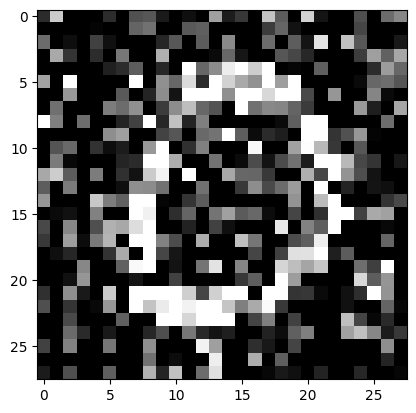

In [28]:
from matplotlib import pyplot as plt
plt.imshow(test_data_noisy[10], cmap='gray')

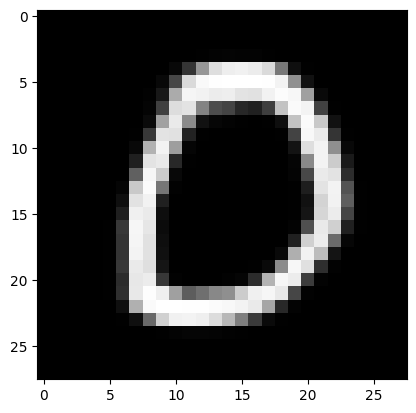

In [30]:
plt.imshow(results[10], cmap='gray')

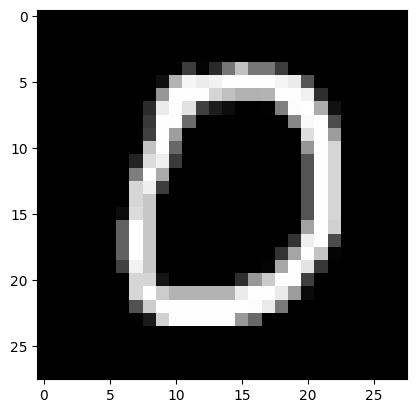

In [31]:
plt.imshow(test_data[10], cmap='gray')

(28, 56, 1)


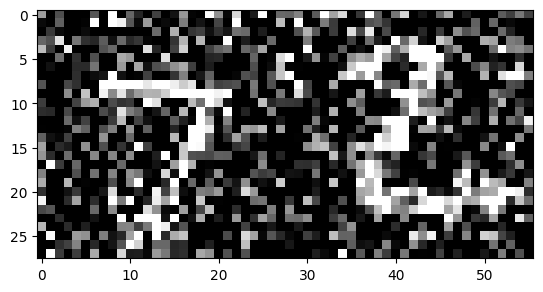

In [32]:
test_image=np.concatenate((test_data_noisy[0], test_data_noisy[1]), axis=1)
print(test_image.shape)
plt.imshow(test_image, cmap='gray')

(28, 28)


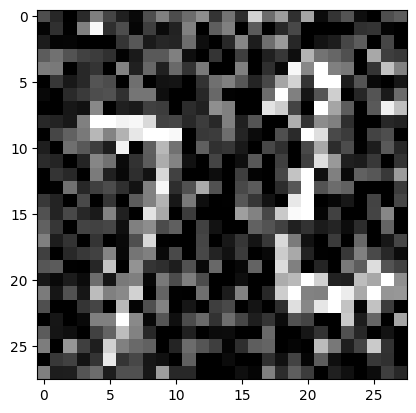

In [33]:
import cv2

test_image=cv2.resize(test_image,(28,28))
print(test_image.shape)
plt.imshow(test_image, cmap='gray')

1/1 [==============================] - 0s 246ms/step
(1, 28, 28, 1)


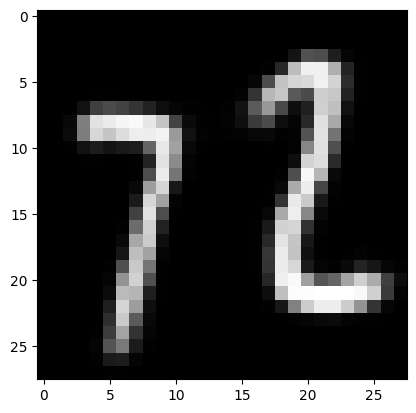

In [37]:
test_image=test_image.reshape(1,28,28,1)
result=autoencorder.predict(test_image)
print(result.shape)
plt.imshow(result.reshape(28,28), cmap='gray')

TypeError: 'type' object is not subscriptable

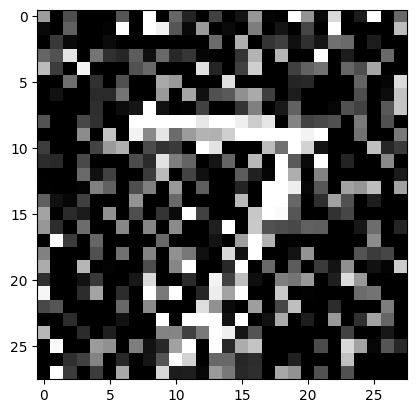

In [41]:
for i in range(len(test_data_noisy)):
  plt.imshow(test_data_noisy[i], cmap='gray')
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/DL_Course/autoencoders/results/'+str[i]+'-input.png')
  plt.close()

  plt.imshow(results[i],cmap='gray')
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/DL_Course/autoencoders/results/'+str[i]+'-predicted.png')
  plt.close()